# COGS 118A - Final Project

# Moscow Real Estate Model

## Group members
- Keri Chen
- Arth Shukla
- WonJae Lee
- Ashley Chu
- Cynthia Delira

# Abstract 
Real estate is the foundation for many life milestones like owning a home, starting a family or a business, and more. However, it may be hard to break into the real estate world without first doing a lot of research and planning because real estate is after all, an investment. By building a ML model that helps predict the price of home, this can hopefully help to make the process easier for prospective homeowners and sellers. The data we will be using encompasses more than 5 million Russian real estate sales from 2018 - 2021 and has multiple variables such as the price of a house, listing date and time, geographic location, region, and information about the building (type, storeys, floor, living rooms, rooms). Although our dataset is in the Russian market, it provides us a lot of data points that can allow us to learn more about the different models and generalize it to different markets.

We will perform some EDA analysis to view the correlation of the different factors, and then build a linear regression model using CART regression, logistic regression, and random forest. We will then evaluate the performance of our model using mean absolute error (MAE).

# Background

The real estate market has been a pivotal factor and contributor in the economy as, according to the National Association of Home Builders, housing’s combined contribution to gross domestic product (GDP) generally averages 15-18%<a name="nahb"></a>[<sup>[1]</sup>](#nahb). This percentage is calculated based on both residential investment and consumption spending on housing. Not only is housing a contributor to the economy but it is also an important asset to people’s lives as it not only signifies having a place to sleep in but is often perceived as a way to show one’s social status and a valuable asset where money can be allocated.


Despite the importance and high contribution that the market is to the economy, it has many factors that can quickly change the market. Although different factors can influence the real estate market, one of the most important factors is demographics<a name="keyfactors"></a>[<sup>[2]</sup>](#keyfactors).

Demographics consists of the data of the population near the location which affects the pricing of the house and also the demand the property has. Places in and near a major city could be more expensive due the proportion of square footage and price<a name="demographics">,</a>[<sup>[3]</sup>](#demographics) since major cities usually have limited land to be developed or already has no more space for new developments. Alhtough real estate predictions across different areas (urban, rural, suburban) can vary due to differences in land use, when considering a single location (e.g. one city) where land use, housing supply, etc., are more similar, demographics prevail as the key difference when comparing real estate.

Our exploration will, therefore, focus on Moscow, the capital of Russia which has a quickly-growing real estate market. Because the market is developing, it can be difficult for an average person to determine which variables contribute most to real estate pricing. By building a model to predict real estate pricing (in rubles), we aim to make distilling this demographic information easier on a larger scale.

There has been a lot of prior (and ongoing) research within the real estate industry, especially real estate companies such as Zillow with their “Neural Zestimate<a name="Zestimate"></a>[<sup>[4]</sup>](#Zestimate)," Redfin with their “Redfin Estimate<a name="Redfin"></a>[<sup>[5]</sup>](#Redfin)," and many other real estate companies also have their own models for estimating home prices. Since each model is built differently, this leads to varying price estimations. However, the bases of the models are similar as they take in large amounts of previous transactions and/or MLS data to get various variables to find good features to base the model off of as they keep retraining to get better results.

# Problem Statement

The real estate market can be a turbulent and rapidly changing environment, where it is often hard to predict the actual value due to many factors.Due to the multitude of different constants, we will focus our model on the general description of the property. We aim to make it easier for people to get this type of information by training a ML model on a large dataset of previous home purchases in order to predict what price point a home may be at. 

# Data

Our current best candidate is the following dataset of <a href="https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021">Russian Real Estate pricing from 2018-2021.</a> The dataset contains an incredible 5 million+ data points, with no null values and only a few thousand duplicate rows. Therefore, our data is very-well poised to avoid generalization without uses of techniques like cross-validation. 

This massive dataset means training could takes many days or even weeks given our computational resources, which is not feasible. Since demographics data can vary between cities/counties. However, our exploration will primarily focus on Moscow. Thus, we are able to limit the size of our data to about 1/10th of the original dataset. Furthermore, if computational cost continues to be an issue, we may randomly sample a subset of our data to train (this will not harm any assumptions for the regression models we will use, since it does not violate any assumptions about the data which these models require)

There are 13 variables, 2 categorical, 2 location-based, and the rest ordinal. We will be removing the latitude and longitude columns as these prevent ethical issues regarding the location of homeowners and intense violations of privacy.

Each observation contains the price of a house, listing date and time, geographic location, region, and information about the building (type, storeys, floor, living rooms, rooms). Notably, it does not contain square footage, which is a landmark in much of the American real estate market.

Critical variables mostly encompass the house descriptions and the time of publishing. We will need to one-hot encode building type. Building type will not largely increase the width of the design matrix.

Finally, we will need to convert data and time of publication to only the year, and potentially also the month, in case we’d like to do time series analysis. As mentioned earlier, we’ll also remove the latitude and longitude due to concerns of privacy. Finally, for our non-tree models, we will also normalize our data points by z-score, since data like price in rubles will be orders of magnitude larger than number of rooms.

# Proposed Solution

Note that we discuss error metrics, including justifications for L1 loss (MAE), in the Evaluation Metrics section.

Before discussing our implementation, regarding benchmark models: there are some models available on Kaggle using time series analysis, which might result in good outputs. However, there are no significant authorities on Russian real estate pricing in machine learning, especially since this is an emerging market. Furthermore, American authorities on real estate prediction often keep their models internal as a part of their business model, so it is difficult to use existing robust benchmark models without APIs and the sort.
First, it is important to note that our dataset is massive. With over 5 million samples, our model will certainly generalize well, but this also means we may have too many confounding variables and our model may not reach high enough MAE. During EDA, we will determine cities which contain interesting data, and we can fragment our data by city. Depending on computational resources and time constraints, we may choose multiple cities, or only use one.

Second, regardless of which or how many cities we use, this data is simply far too massive for any form of CV. Additionally, CV is not necessary here, since our validation set is likely to generalize well.
Finally, luckily much of the data is ordinal, with few categorical variables with limited possible values. For our regression models, we may try to avoid extra data points such that we don’t have too many features in our design matrix. However, to attempt to include these features in at least one model, we will also try random forests.

- CART Regression
- Linear regression using L1 loss
- After performing EDA, if certain metrics seem like they could use polynomial features, we can also try polynomial regression using L1 loss.
- Random Forests to include categorical variables.


We can also try variants of linear and polynomial regression using L2 regularization. It is unlikely that many of these features will be confounding (though we can confirm with EDA), so L2 regularization is likely more reasonable. We can also try mixed regularization in case some features are, indeed, confounding.

Then, if we have enough computational resources, we can perform grid search on different hyperparameters for model selection. However, if this is not feasible, we can empirically justify pruning techniques, regularization mix, etc.

Finally, we will use sklearn for all implementations for 1) readable code, and 2) efficient, thoroughly tested implementations of the algorithms discussed above. While tools like Keras do have gpu acceleration, these methods aren’t as useful for our models as compared to neural network models.


# Evaluation Metrics

The three most common metrics for regression are mean squared error (MSE), mean absolute error (MAE) and root mean squared error (RMSE). MSE and RMSE heavily penalize outliers, while MAE proportionately penalizes all errors. Our data includes some more extreme outliers (10 living rooms, 39th floor, etc). For these ‘extreme’ sorts of houses, there are also many extra possible factors beyond measurable features like number of rooms; for example, the ‘art’ of designing expensive homes with luxury features. So, using MSE or RMSE would likely bias our model to these extreme outliers while lowering our model’s success in gauging prices for a majority of houses on the market. Conversely, MAE would result in a better representation of the data for a majority of ‘normal’ cases. Therefore, we will stick to MAE.

# Results


# Group 005 Real Estate Analysis

## Setup and Load Data

First, we retrieve the dataste from https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-20182021.

If using the below cell, make sure you have a Kaggle API token in a `kaggle.json` file in `~/.kaggle/`. Otherwise, please download the data manually and place it under a folder `./data/`.

In [ ]:
# !mkdir data
# !kaggle datasets download mrdaniilak/russia-real-estate-20182021
# !mv ./russia-real-estate-20182021.zip ./data/russia-real-estate-20182021.zip

In [ ]:
# import zipfile
# with zipfile.ZipFile('./data/russia-real-estate-20182021.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data')

Now, we may proceed with exploration.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DATA_CSV_PATH = './data/all_v2.csv'

# load csv data
df = pd.read_csv(DATA_CSV_PATH)

# remove duplicate data
df = df.drop_duplicates()

In [ ]:
df.sample(5)

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
3062183,2530000,2019-12-20,01:30:18,50.601726,36.601702,5952,1,2,9,1,35.00,10.0,1
41186,1190000,2018-09-14,02:12:39,54.947141,82.958596,9654,1,1,10,1,41.36,11.0,1
2835037,3100000,2019-11-05,06:27:25,57.115194,65.559313,3991,2,1,14,1,39.00,12.0,1
46232,1990000,2018-09-14,15:21:55,45.097870,39.004688,2843,0,5,16,1,40.00,16.0,11
1712186,2400000,2019-04-30,11:00:17,55.188396,61.329709,5282,1,3,9,3,55.00,9.0,1


Note that this Kaggle Dataset was originally pulled from GeoNames (http://www.geonames.org/), which has its own "regions" separated by county. Our city of interest, Moscow, has ID 81.

Addtionally, we will give categorical data appropriate labels given by the dataset spec.

Finally, while the dataset used Russian rubles for real estate price, we use US Dollars for more interpretable loss (since the Ruble prices are in the millions, and since we are more familiar with the US Dollar).

In [ ]:
MOSCOW_CODE = 81
MAX_NUM_SAMPLES = 100000
SEED = 69

RUBLE_TO_DOLLAR = 0.012

moscow_df = df.loc[df['region'] == MOSCOW_CODE]
moscow_df = moscow_df.drop(['time', 'geo_lat', 'geo_lon', 'region'], axis=1)
moscow_df['date'] = moscow_df['date'].apply(lambda x: int(x[:4]))

moscow_df['object_type'] = moscow_df['object_type'].replace(1, 'preowned').replace(11, 'new')
moscow_df['building_type'] = moscow_df['building_type'].replace(0, 'other').replace(1, 'panel').replace(2, 'monolithic').replace(3, 'brick').replace(4, 'blocky').replace(5, 'wooden')

# -1 means studio apartment, so we replace with 0 (since studio apartments have no extra rooms)
# there are not other datapoints with value 0
moscow_df['rooms'] = moscow_df['rooms'].replace(-1, 0)

# remove rows with errorneous data
moscow_df = moscow_df[moscow_df['price'] >= 0]
moscow_df = moscow_df[moscow_df['rooms'] >= 0]

#  convert to US dollar per conversion rate as of June 12, 2023
moscow_df['price'] = moscow_df['price'] * RUBLE_TO_DOLLAR

# cap number of elements
moscow_df = moscow_df.sample(MAX_NUM_SAMPLES, random_state=SEED)

In [ ]:
moscow_df.isnull().values.any()

False

In [ ]:
moscow_df.sample(5)

,price,date,building_type,level,levels,rooms,area,kitchen_area,object_type
2263684,62400.00,2019,monolithic,20,24,2,62.0,12.0,preowned
4742429,130200.00,2020,monolithic,23,25,3,92.3,27.0,preowned
844302,36751.32,2018,panel,23,25,1,19.9,5.0,new
3987839,51600.00,2020,panel,10,10,1,42.8,10.5,preowned
1315428,87193.08,2019,monolithic,11,24,3,80.6,13.9,new


## Exploration

First, we'll look at the data distributions for the ordinal data.

In [ ]:
moscow_df.describe()

,price,date,level,levels,rooms,area,kitchen_area
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.707663e+04,2019.310120,7.053700,12.752370,1.776320,51.592710,10.362995
std,3.556933e+04,0.880621,5.692804,7.411351,0.862656,21.748209,6.834285
min,1.800000e+01,2018.000000,1.000000,1.000000,0.000000,2.400000,0.120000
25%,3.600000e+04,2019.000000,3.000000,5.000000,1.000000,38.000000,7.000000
50%,5.160000e+04,2019.000000,5.000000,12.000000,2.000000,46.000000,9.700000
75%,7.140000e+04,2020.000000,10.000000,17.000000,2.000000,61.900000,12.000000
max,3.572896e+06,2021.000000,36.000000,38.000000,9.000000,997.000000,1131.000000


Each column is skewed right, meaning we have some extreme outliers for each column. This is because in the real estate market, while most "normal" places have a similar price, the price ceiling for real estate can be very high. While these outliers are sparse, they could still bias our model.

Next, we can plot each variable against price to look for possible correlations. We will only looks at data points with price less than $2 \cdot 10^7$ to get better plots by removing price outliers. We will also plot regression lines for each to quantify per-variable correlation strength.

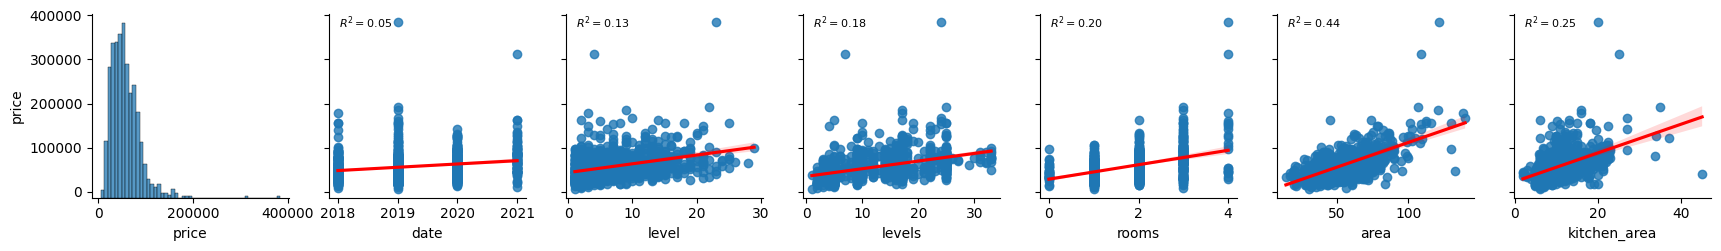

In [ ]:
from scipy.stats import linregress

def calc_R2(x, y, ax=None, **kwargs):
    ax = ax or plt.gca()
    _, _, r_value, _, _ = linregress(x=x, y=y)
    ax.annotate(f'$R^2 = {r_value ** 2:.2f}$', xy=(.05, 1), xycoords=ax.transAxes, fontsize=8, ha='left', va='top')

g = sns.pairplot(moscow_df.loc[moscow_df['price'] < 2e7].sample(1000, random_state=21), kind='reg', y_vars=['price'], plot_kws={'line_kws':{'color':'red'}})

g.map_upper(calc_R2)
plt.show()

Data and level have near-zero correlations. The number of levels in the building (i.e. building size) and number of rooms, as well have kitchen area, seem like they might have some significance. The most important (single) variable seems to be area. However, even here we don't have a strong correlation. Hopefully combining these variables into a multivariate regression will lead to stronger correlation.

Additionally, all of the correlations seem to be closest to linear (as opposed to some polynomial fit). So, a polynomial regression may not perform better than a linear regression.

However, in the above we only use about 1000 samples (for efficiency). We can see these correlation results across the dataset more easily with a heatmap:

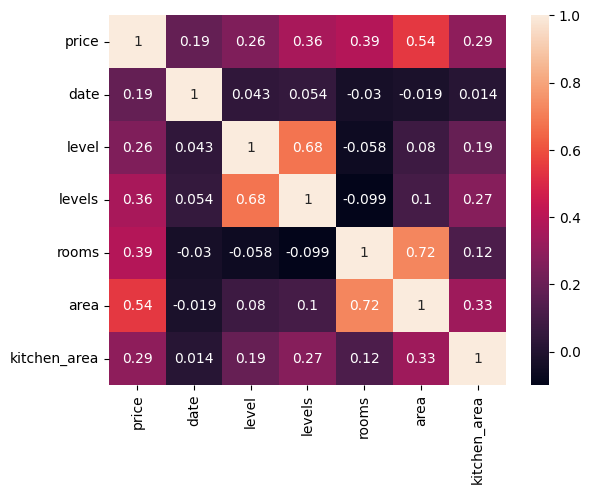

In [ ]:
sns.heatmap(moscow_df.drop(['building_type', 'object_type'], axis=1).corr(), annot=True)
plt.show()

Notably, `date` and `level` have a stronger correlation than from our 1000 samples, but each individual variable still does not have a strong enough correlation for prediction.

Thus, we proceed to fitting some models.

## Preprocessing Data for Models

In [ ]:
from sklearn.model_selection import train_test_split

X = moscow_df[['date', 'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'object_type']]
y = moscow_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

print(f'{len(y_train)} train samples; {len(y_test)} test samples')

70000 train samples; 30000 test samples


Now, we will one-hot the categorical data using sklearn's one hot encoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

for col in ['building_type', 'object_type']:

    one_hot = OneHotEncoder()
    one_hot.fit(X_train[[col]])

    X_train.loc[:, one_hot.categories_[0]] = one_hot.transform(X_train[[col]]).todense()
    X_test.loc[:, one_hot.categories_[0]] = one_hot.transform(X_test[[col]]).todense()

    X_train = X_train.drop(col, axis=1)
    X_test = X_test.drop(col, axis=1)

X_train.sample(5)

,date,level,levels,rooms,area,kitchen_area,blocky,brick,monolithic,other,panel,wooden,new,preowned
4065819,2020,9,25,1,35.7,17.00,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1038879,2019,4,10,1,41.8,11.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4628192,2020,2,25,1,39.5,18.10,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
467894,2018,2,2,2,45.0,7.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4095709,2020,15,21,2,60.6,12.94,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Next, we will scale the data. Note that not all models require scaled data; while models like linear regression require scaling to avoid overemphasis of certain datapoints, models like descision trees (and, by extension, random forests) are not affected by unscaled variables (though, of course, scaled data won't negatively impact performance models like descision trees, either).

In [ ]:
from sklearn.preprocessing import StandardScaler

ordinal_cols = ['date', 'level', 'levels', 'rooms', 'area', 'kitchen_area']
X_train_ordinal, X_test_ordinal = X_train[ordinal_cols], X_test[ordinal_cols]

scaler = StandardScaler()
scaler.fit(X_train_ordinal)

X_train_scaled, X_test_scaled = X_train, X_test

X_train_scaled.loc[:, scaler.feature_names_in_] = scaler.transform(X_train_ordinal)
X_test_scaled.loc[:, scaler.feature_names_in_] = scaler.transform(X_test_ordinal)

X_train_scaled.sample(5)

,date,level,levels,rooms,area,kitchen_area,blocky,brick,monolithic,other,panel,wooden,new,preowned
531405,-1.486208,-0.364642,-1.052022,-0.900040,-1.443469,-0.713346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
852950,-1.486208,0.514697,0.432760,0.257887,0.166966,1.310532,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5106064,1.919550,-0.364642,-0.917041,-0.900040,-0.302934,0.212611,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3020574,-0.350955,-0.188774,1.647581,0.257887,0.399636,0.278751,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2738752,-0.350955,-0.012906,0.567740,-0.900040,-0.348556,-0.184227,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Fitting

When we began training models, an immediate issue presented itself: we didn't have sufficient compuational resources to handle very large data using only Sklearn's cpu-only implenetaions. This made training very slow and hyperparameter tuning out of the question.

However, training only on our data with hyperparams chosen heurisitically did not offer good enough results. So, in order to allow for hyperparam tuning on our large data, we implement Nvidia's [RAPIDS](https://rapids.ai/) API, which offers models with similar syntax to Sklearn, but with GPU acceleration. In particular, RAPIDS includes the CuML package, which accelerates training significantly.

The main challenge with using RAPIDS was technical implementation: we acheived most stability on WSL2 Ubuntu on Windows with CUDA 11.5, and some functions in CuML seem less stable (i.e. more prone to crashing or hanging on computation) with this setup.

**Finally**, although we will be testing different models, we will not be peforming Nested CV for algorithm selection. Even with the RAPIDS API, performing Nested CV would be simply too computationally intensive, and also likely wouldn't realize better results on our large data.

### Rapids CuML Setup

First, we convert our data using CuDF and CuPY to allow our CuML models to use GPU acceleration.

In [ ]:
import cudf
import cupy as cp

def to_cudf(pd_df):
    data = dict()

    for col in pd_df.columns:
        data[col] = pd_df[col].to_numpy(dtype=np.float32)

    return cudf.DataFrame(data)

def to_cupy(pd_df):
    return cp.from_dlpack(pd_df.to_dlpack())

In [ ]:
X_train_cudf = to_cudf(X_train)
X_test_cudf = to_cudf(X_test)

X_train_cupy = to_cupy(X_train_cudf)
X_test_cupy = to_cupy(X_test_cudf)

In [ ]:
X_train_scaled_cudf = to_cudf(X_train_scaled)
X_test_scaled_cudf = to_cudf(X_test_scaled)

X_train_scaled_cupy = to_cupy(X_train_scaled_cudf)
X_test_scaled_cupy = to_cupy(X_test_scaled_cudf)

In [ ]:
y_train_cudf = cudf.Series(y_train.to_numpy())
y_test_cudf = cudf.Series(y_test.to_numpy())

y_train_cupy = to_cupy(y_train_cudf)
y_test_cupy = to_cupy(y_test_cudf)

Next, we found that Sklearn's `GridSearchCV` and `RandomizedSearchCV` were somewhat unstable with RAPIDS on our machines; in particular, there seemed to be some issues regarding the way Sklearn initializes new models when performing hyperparam tuning.

For this reason, we create a `custom_grid_search` function which, though containing fewer features, is more stable with RAPIDS.

Addtionally, our cross-validation will use 3 folds. Because our data is larger, fewer splits in our CV will still give our models enough data to train while reducing variability in predicitons.

While this function allows us to perform CV using RAPIDS in a more stable manner, it has the drawback of not being able to view variability of fit curves. However, given our large data and low `k=3`, our varaiblity in prediction from CV will likely not be an issue.

In [ ]:
from sklearn.metrics import mean_absolute_error

def custom_grid_search(model, hparams, default_kwargs, X_train_cupy, y_train_cupy,
                       folds=3, verbose=0):
    import itertools
    
    # note that the KFold class in SciKit by default does not use shuffling, so we will not implement shuffling here
    X_splits = cp.array_split(X_train_cupy, folds)
    y_splits = cp.array_split(y_train_cupy, folds)
    cv_scores = dict()

    # we use the same model instance to avoid RAPIDS crashing
    cuml_model = model(**default_kwargs)
    for hparam_comb in itertools.product(*hparams.values()):
        kwargs = dict(zip(hparams.keys(), hparam_comb))
        
        holdouts = []
        
        if verbose >= 1:
            print(f'Training CV with {folds} folds on hparams {kwargs}')

        # setting new params seems more stable on CuML
        cuml_model.set_params(**kwargs, **default_kwargs)
        
        for i in range(folds):
            
            # train data is everything except hold-out
            train_sets = [X_splits[j] for j in range(len(X_splits)) if j != i]
            label_sets = [y_splits[j] for j in range(len(y_splits)) if j != i]
                
            train_arr = cp.vstack(train_sets)
            labels_arr = cp.hstack(label_sets)
            cuml_model.fit(train_arr, labels_arr)
            
            # get pred error using hold-out
            preds = cuml_model.predict(X_splits[i])   
            score = mean_absolute_error(cp.asnumpy(preds), cp.asnumpy(y_splits[i]))     
            holdouts.append(score)
            
            if verbose >= 2:
                print(f'\tholdout {i}: {score}')
            
            del train_arr, labels_arr, train_sets, label_sets

        cv_score = np.mean(holdouts)
        cv_scores[str(kwargs)] = cv_score
        
        if verbose >= 1:
            print('CV Score:', cv_score)
            
    del X_splits, y_splits
    
    return cv_scores

We will also want to investigate whether our sample size is sufficient for learning, and whether more data would aid learning substantially. Hence, we create a learning curve plotting function. Luckily, Sklearn's `learning_curve` function seems fairly stable with RAPIDS.

In [ ]:
def get_learning_curve(estimator, X, y, model_name='Model', train_sizes=[500, 5000, 10000, 20000, 30000, 40000, 50000, 56000]):
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt

    train_sizes, train_scores, test_scores = learning_curve(
        estimator=estimator,
        X=X,
        y=y,
        scoring="neg_mean_absolute_error",
        train_sizes = train_sizes,
        n_jobs=None
    )

    train_mean = -train_scores.mean(axis=1)
    test_mean = -test_scores.mean(axis=1)

    plt.subplots(figsize=(5,4))
    plt.plot(train_sizes, train_mean, label="train")
    plt.plot(train_sizes, test_mean, label="validation")

    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.legend(loc='best')

    plt.show()

Finally, we set our device to GPU for accelerated testing.

In [ ]:
from cuml.common.device_selection import using_device_type, set_global_device_type
import pickle
set_global_device_type('GPU')

### Linear Regression

Each of our ordinal variables seemed to have a (weak) close-to-linear relationship with price. So, using Linear Regression as our first model seems reasonable. We will also not be using Polynomal features for the same reason.

Unfortunately CuML does not natively support MAE Loss for linear regression. However, we can still perfrom mini-batch SGD linear regression and measure MAE loss after-the-fact. We expect this will increase the end MAE loss, and thus negatively affect the model's performance. However, the sklearn implementation's large train time is infeasible given our computational resources.

**NOTE**: Oftentimes many one-hotted features can negatively impact performance for linear regression. To address this, we will train on the ordinal (not one-hotted) data for linear regression. Later, we will train other models which aren't affected by data with many categorical features (e.g. random forests).

In [ ]:
from cuml.linear_model import MBSGDRegressor as cumlMBSGDRegressor

We will try no regularization, L1 (LASSO) regularization, and L2 (Ridge) regression. We will also try different learning rates and numbers of epochs.

In [ ]:
learning_rates = [1e-3, 5e-4, 1e-4]
penatlies = ['none', 'l1', 'l2']
epochs = [5, 10, 20]
variable_lr = ['constant', 'adaptive']

hparam_grid = dict(
    learning_rate=variable_lr,
    eta0=learning_rates,
    penalty=penatlies,
    epochs=epochs,
)

def_kwargs = dict(
    loss='squared_loss',
    tol=0.0,
    fit_intercept=True,
    batch_size=16,
    verbose=False,
)

In [ ]:
cv_scores_sgd = custom_grid_search(cumlMBSGDRegressor, hparam_grid, def_kwargs, X_train_scaled_cupy[:,:len(ordinal_cols)], y_train_cupy, folds=3, verbose=1)

Training CV with 3 folds on hparams {'learning_rate': 'constant', 'eta0': 0.001, 'penalty': 'none', 'epochs': 5}
CV Score: 14403.76738693239
Training CV with 3 folds on hparams {'learning_rate': 'constant', 'eta0': 0.001, 'penalty': 'none', 'epochs': 10}
CV Score: 13731.922702740245
Training CV with 3 folds on hparams {'learning_rate': 'constant', 'eta0': 0.001, 'penalty': 'none', 'epochs': 20}
CV Score: 13735.842440235096
Training CV with 3 folds on hparams {'learning_rate': 'constant', 'eta0': 0.001, 'penalty': 'l1', 'epochs': 5}
CV Score: 14403.767361263963
Training CV with 3 folds on hparams {'learning_rate': 'constant', 'eta0': 0.001, 'penalty': 'l1', 'epochs': 10}
CV Score: 13731.92264526168
Training CV with 3 folds on hparams {'learning_rate': 'constant', 'eta0': 0.001, 'penalty': 'l1', 'epochs': 20}
CV Score: 13735.84239620721
Training CV with 3 folds on hparams {'learning_rate': 'constant', 'eta0': 0.001, 'penalty': 'l2', 'epochs': 5}
CV Score: 14403.729347750179
Training CV w

In [ ]:
opt_sgd_params = min(cv_scores_sgd, key=cv_scores_sgd.get)

print(opt_sgd_params)

{'learning_rate': 'constant', 'eta0': 0.0005, 'penalty': 'none', 'epochs': 10}


In [ ]:
opt_sgd_params = {'learning_rate': 'constant', 'eta0': 0.0005, 'penalty': 'l2', 'epochs': 10}
def_kwargs['verbose'] = 2
opt_sgd_model = cumlMBSGDRegressor(**opt_sgd_params, **def_kwargs)

opt_sgd_model.fit(X_train_scaled_cupy[:,:len(ordinal_cols)], y_train_cupy)

MBSGDRegressor()

In [ ]:
opt_sgd_preds = opt_sgd_model.predict(X_test_scaled_cupy[:,:len(ordinal_cols)])   
opt_sgd_score = mean_absolute_error(cp.asnumpy(opt_sgd_preds), cp.asnumpy(y_test_cupy))     
print('MBSGDRegressor MAE:', opt_sgd_score)

MBSGDRegressor MAE: 13706.061317947917


When examining our learning curve, it seems that, although MAE overall decreases somewhat with more data, this is not a strict decline; while new data might help make better predictions, it can also inject more noise. Perhaps, for our Linear Regressor in particular, using the full 500k samples could allow the model to decrease MAE marginally, but it seems more data is not necessarily the solution for better performance.

Therefore, we will proceed to running more powerful estimators to see if we can improve performance.

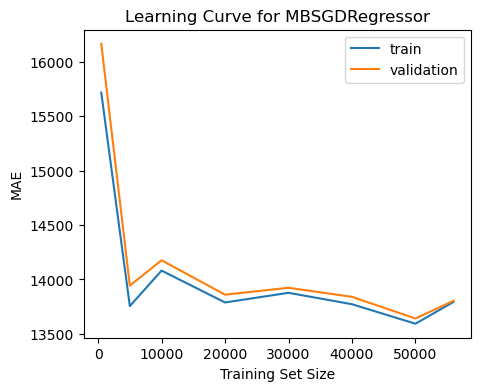

In [ ]:
get_learning_curve(opt_sgd_model, X=cp.asnumpy(X_train_scaled_cupy[:,:len(ordinal_cols)]), y=cp.asnumpy(y_train_cupy), model_name='MBSGDRegressor')

### KNN Regression

KNNs can also be used for regression and don't require training a model (since we only use data). Because we have a very large dataset, it KNN regression might perform well.

That being said, KNNs are also sensitive to unscaled data, as well as data with many features (due to the curse of dimensionality). Therefore, we will used only the scaled, ordinal data here as well.

In [ ]:
from cuml.neighbors import KNeighborsRegressor

Due to the simplicity of KNN, we only need to test the k-values in our hyperparam search. Since the KNN regressor requires no real train time, we can test many k-values in our grid search.

In [ ]:
n_neighbors = list(np.arange(1, 100))

hparam_grid = dict(
    n_neighbors=n_neighbors,
)

def_kwargs = dict(
    verbose=False,
)

In [ ]:
cv_scores_knn = custom_grid_search(KNeighborsRegressor, hparam_grid, def_kwargs, X_train_scaled_cupy[:,:len(ordinal_cols)], y_train_cupy, folds=3, verbose=1)

Training CV with 3 folds on hparams {'n_neighbors': 1}
CV Score: 15975.834725993043
Training CV with 3 folds on hparams {'n_neighbors': 2}
CV Score: 14492.496787926195
Training CV with 3 folds on hparams {'n_neighbors': 3}
CV Score: 13854.731727652039
Training CV with 3 folds on hparams {'n_neighbors': 4}
CV Score: 13558.999188825675
Training CV with 3 folds on hparams {'n_neighbors': 5}
CV Score: 13363.38026333578
Training CV with 3 folds on hparams {'n_neighbors': 6}
CV Score: 13218.484661646899
Training CV with 3 folds on hparams {'n_neighbors': 7}
CV Score: 13122.148907950303
Training CV with 3 folds on hparams {'n_neighbors': 8}
CV Score: 13044.330554730457
Training CV with 3 folds on hparams {'n_neighbors': 9}
CV Score: 12994.160171705907
Training CV with 3 folds on hparams {'n_neighbors': 10}
CV Score: 12954.936878527145
Training CV with 3 folds on hparams {'n_neighbors': 11}
CV Score: 12918.059344215197
Training CV with 3 folds on hparams {'n_neighbors': 12}
CV Score: 12893.230

In [ ]:
opt_knn_params = min(cv_scores_knn, key=cv_scores_knn.get)

print(opt_knn_params)

{'n_neighbors': 30}


In [ ]:
opt_knn_params = {'n_neighbors': 30}
def_kwargs['verbose'] = 2
opt_knn_model = KNeighborsRegressor(**opt_knn_params, **def_kwargs)

opt_knn_model.fit(X_train_scaled_cupy[:,:len(ordinal_cols)], y_train_cupy)

KNeighborsRegressor()

We are able to acheive lower MAE loss than our Linear Regression!

In [ ]:
opt_knn_preds = opt_knn_model.predict(X_test_cupy[:,:len(ordinal_cols)])   
opt_knn_score = mean_absolute_error(cp.asnumpy(opt_knn_preds), cp.asnumpy(y_test_cupy))     
print('KNeighborsRegressor MAE:', opt_knn_score)

KNeighborsRegressor MAE: 12684.34772671146


While the learning curve sees a more stable decrease in MAE with more data, the end result is similar as before: more data could allow the model to decrease MAE somewhat, but not by a significant amount.

[I] [12:51:10.570436] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:10.602495] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:10.631667] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:10.696755] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:10.789240] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:10.859824] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:10.927509] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:11.003513] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:11.093514] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:11.100216] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [12:51:11.109746] Unused keyword parameter: n_jobs during cuML estimator ini

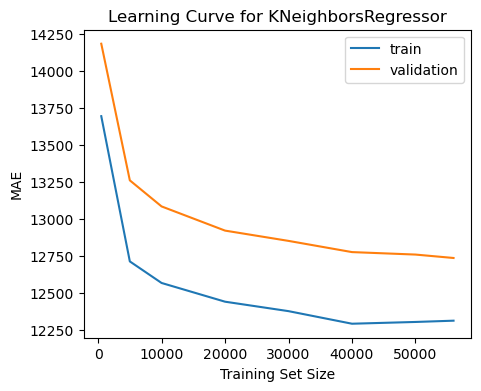

In [ ]:
get_learning_curve(opt_knn_model, X=cp.asnumpy(X_train_scaled_cupy[:,:len(ordinal_cols)]), y=cp.asnumpy(y_train_cupy), model_name='KNeighborsRegressor')

### Random Forests for Regression

Next, we implement Random Forests for regression. Random Forests are an ensemble method which perform well on a host of different problems. Additionally, unlike models like linear regression or KNN regression, random forests are able to handle unscaled and categorical data well. So, we use the whole dataset here.

In [ ]:
from cuml.ensemble import RandomForestRegressor as cuRF

In [ ]:
n_estimators = [100, 300, 500, 600]
max_depth = [10, 40, 100]
min_samples_split = [2, 5, 10]

hparam_grid = dict(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
)

def_kwargs = dict(
    accuracy_metric='mean_ae',
    verbose=False,
    random_state=SEED,
    n_streams=1,
)

In [ ]:
cv_scores_RF = custom_grid_search(cuRF, hparam_grid, def_kwargs, X_train_cupy, y_train_cupy, folds=3, verbose=1)

Training CV with 3 folds on hparams {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}
CV Score: 12262.603246456178
Training CV with 3 folds on hparams {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}
CV Score: 12258.12945560379
Training CV with 3 folds on hparams {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10}
CV Score: 12250.63613764298
Training CV with 3 folds on hparams {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 2}
CV Score: 12050.330507251123
Training CV with 3 folds on hparams {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 5}
CV Score: 11982.79636236684
Training CV with 3 folds on hparams {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 10}
CV Score: 11896.202565839785
Training CV with 3 folds on hparams {'n_estimators': 100, 'max_depth': 100, 'min_samples_split': 2}
CV Score: 12050.330782143443
Training CV with 3 folds on hparams {'n_estimators': 100, 'max_depth': 100, 'min_samples_split': 5}
CV S

In [ ]:
opt_rf_params = min(cv_scores_RF, key=cv_scores_RF.get)

print(opt_rf_params)

{'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 10}


In [ ]:
opt_rf_params = {'n_estimators': 600, 'max_depth': 40, 'min_samples_split': 10}
def_kwargs['verbose'] = 2
opt_rf_model = cuRF(**opt_rf_params, **def_kwargs)

opt_rf_model.fit(X_train_cupy, y_train_cupy)

RandomForestRegressor()

As seen below, we achieve lower MAE compared to Linear Regression or KNN regression!

In [ ]:
opt_rf_preds = opt_rf_model.predict(X_test_cupy)   
opt_rf_score = mean_absolute_error(cp.asnumpy(opt_rf_preds), cp.asnumpy(y_test_cupy))     
print('RandomForest MAE:', opt_rf_score)

RandomForest MAE: 11737.414786409116


In [ ]:
opt_rf_params = {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 10}
def_kwargs['verbose'] = 2
opt_rf_model = cuRF(**opt_rf_params, **def_kwargs)

Our Random Forest does overall perform better, but our loss decreases seems like it is leveling off as previous models.

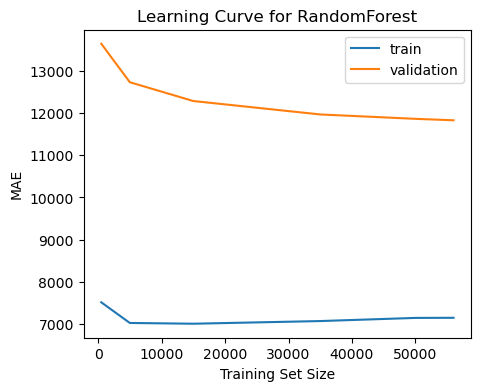

In [ ]:
get_learning_curve(opt_rf_model, X=cp.asnumpy(X_train_cupy), y=cp.asnumpy(y_train_cupy), model_name='RandomForest', train_sizes=[500, 5000, 15000, 35000, 50000, 56000])

### XGBoost Regression

XGBoost is one of the best-performing classical ML algorithms. Here, we will *not* be using RAPIDS; instead be will be using the [xgboost](https://xgboost.readthedocs.io/en/stable/) library.

This library seems much more stable on our machines, and works well with Sklearn's hyperparam search classes. However, there are many hyperparams to test, and some combinations can take a while to train (both because XGBoost is somewhat more complicated than KNN, for example, as well as because CuML seems faster than using Sklearn grid search with `xgboost`). So, we used `RandomizedSearchCV` instead of grid search.

In [ ]:
from xgboost import XGBRegressor

xg_boost_model = XGBRegressor(
    objective= 'reg:absoluteerror',
    tree_method='gpu_hist',
    nthread=4,
    seed=SEED,
)

params = {
    'learning_rate': [0.1, 0.01, 0.05],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': range(2, 10, 1),
    'n_estimators': [100, 500, 1000, 2000],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xg_rand_search = RandomizedSearchCV(xg_boost_model, params, n_iter=100,
                                    scoring='neg_mean_absolute_error', cv=3,
                                    random_state=SEED, verbose=1, refit=True,)

In [ ]:
xg_rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          nthread=4, num_parallel_tree=None,
                                          objective='reg:absoluteerror', ...),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'learning_rate': [0.1, 0.01, 0.05],
                                        'max_depth': range(2, 10),
                                        'n_estimators': [100, 500, 1000, 2000],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=69, scoring='neg_mean_absolute_error',
                   verbose=1)

In [ ]:
xg_rand_search.best_params_

{'subsample': 0.8,
 'n_estimators': 2000,
 'max_depth': 2,
 'learning_rate': 0.1,
 'gamma': 2,
 'colsample_bytree': 0.6}

In [ ]:
opt_xg_boost_model = XGBRegressor(
    objective= 'reg:absoluteerror',
    tree_method='gpu_hist',
    nthread=4,
    seed=SEED,
    # opt parameters
    subsample=0.8,
    n_estimators=2000,
    max_depth=2,
    learning_rate=0.1,
    gamma=2,
    colsample_bytree=0.6
)

opt_xg_boost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, nthread=4, num_parallel_tree=None,
             objective='reg:absoluteerror', ...)

In [ ]:
opt_xg_boost_preds = opt_xg_boost_model.predict(X_test)
opt_xg_boost_score = mean_absolute_error(opt_xg_boost_preds, y_test)
print('XGBoostRegressor MAE:', opt_xg_boost_score)

XGBoostRegressor MAE: 11922.813671071091


XGBoost has a similar situation with its learning curve: more data is unlikely to significantly decrease MAE.

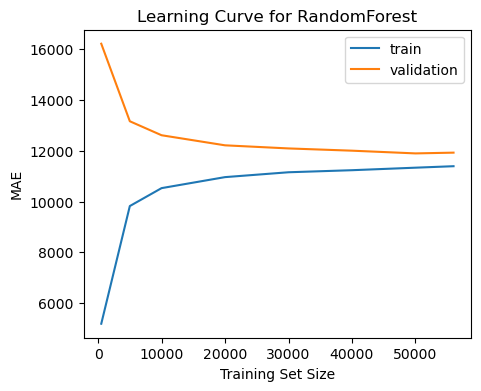

In [ ]:
get_learning_curve(opt_xg_boost_model, X=X_train, y=y_train, model_name='RandomForest')

### DNN For Regression

The above methods all used classical ML methods. Now, we examine whether DL can help better tackle our regression problem.

Below, we train a DNN for regression using PyTorch.

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('mps') if torch.backends.mps.is_available() else torch.device('cpu')

device

device(type='mps')

Below we configure a PyTorch Dataset. Later, we will use Dataloaders for efficient batch loading for our data.

In [ ]:
class RealEstateDataset(Dataset):
    def __init__(self, X_train, y_train, X_test, y_test, train=True, max_cache_size=800000):
        self.df = df
        self.train = train

        self.X = X_train if self.train else X_test
        self.y = y_train if self.train else y_test

        self.cache = dict()
        self.max_cache_size = max_cache_size

    def __getitem__(self, index):

        if index in self.cache.keys():
            return self.cache[index]

        X_sample = torch.tensor(self.X[index]).to(torch.float32).squeeze()
        y_sample = torch.tensor(self.y[index]).to(torch.float32).squeeze()

        if len(self.cache) >= self.max_cache_size:
            self.cache.popitem()

        self.cache[index] = (X_sample, y_sample)

        return self.cache[index]

    def __len__(self):
        return len(self.X)

In [ ]:
train_dataset = RealEstateDataset(X_train_scaled.to_numpy(), y_train.to_numpy(), X_test_scaled.to_numpy(), y_test.to_numpy(), train=True)
test_dataset = RealEstateDataset(X_train_scaled.to_numpy(), y_train.to_numpy(), X_test_scaled.to_numpy(), y_test.to_numpy(), train=False)

Now we buid our DNN. We use the following considerations:

1. We try using both regular and leaky ReLU. While tanh and sigmoid we used for a while in DL, the modern consensus is that [they do not perform as well as simple ReLUs (and their variants)](https://www.aitude.com/comparison-of-sigmoid-tanh-and-relu-activation-functions/).
2. We offer an optional implementation for dropout (since they can help improve generalization), but in our testing it simply increases the number of epochs needed to acheive optimality.
3. We use He initialization for the weights, the most common initialization for ReLU activatons. Brief testing inicated that fan-in performed better, meaning our forward-pass variances were likely more "chaotic" than for our backward passes (most likely because the initial forward pass is performed without any fitting to the data).

NOTE: Normally, we'd use a separate validation set for hyperparam tuning, then retrain on train and validation, then test the model on the test set. However, for DNNs, this is not feasible since they take much longer to train. So, instead, we simply use a train and test set.

In [ ]:
class RegressionDNN(nn.Module):
    def __init__(self, input_size, fcs=[24, 12, 6, 1], dropout=None, relu='leaky'):
        super(RegressionDNN, self).__init__()

        self.input_size = input_size
        self.fcs = fcs
        self.dropout = dropout
        self.relu = relu

        self.model = nn.Sequential(
            *self._make_layers()
        )

        self.model.apply(self.init_weights)

    def _make_layers(self):
        layers = [nn.Linear(self.input_size, self.fcs[0])]

        for i in range(len(self.fcs) - 1):
            if self.relu == 'normal':
                layers.append(nn.ReLU())
            elif self.relu == 'leaky':
                layers.append(nn.LeakyReLU())
            if self.dropout is not None:
                layers.append(nn.Dropout(self.dropout))
            layers.append(nn.Linear(self.fcs[i], self.fcs[i+1]))

        return layers
    
    def init_weights(self, m):
        if isinstance(m, nn.Linear):
            torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
            m.bias.data.fill_(0.01)

    def forward(self, x):
        return self.model(x).squeeze()

In [ ]:
BATCH_SIZE = 64
EPOCHS = 500
DATA_DIMS = train_dataset[0][0].size(0)

In [ ]:
train_dl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=BATCH_SIZE)

Our train pass includes both a train and validation iteration so we can evaluate generalization as training proceeds (so we can determine when our DNN starts to overfit).

We also save our model every epoch so we can load the optimal weights after training concliudes (unlike the other models, training the DNN is quite slow).

In [ ]:
from tqdm import tqdm
import sys
from pathlib import Path
import os
import wandb

def save(model, optimizer, save_path='model_checkpoint.pt'):

    save_dict = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict(),
    }

    torch.save(save_dict, save_path)

def load(model, optimizer, load_path='model_checkpoint.pt'):

    checkpoint = torch.load(load_path, map_location=device)

    model.load_state_dict(checkpoint['model'])
    optimizer.load_state_dict(checkpoint['optimizer'])

    return model, optimizer

def train(train_dl, test_dl, epochs=EPOCHS, batch_size=BATCH_SIZE, input_size=DATA_DIMS, print_batch_every=None,
          lr=1e-4, dropout=None, opt='adam', relu='normal',
          checkpoint_dir='./checkpoints', pretrained_path=None,
          logging = False, log_init = False, project_name='Russian-Real-Estate-Regression', group_name='DNN', run_name=None,
          model_fcs=None):
    
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    if logging and log_init:
        wandb.init(project=project_name, group=group_name, name=run_name, config=dict(
            batch_size = batch_size,
            epochs = epochs,
            fcs = str(model_fcs),
            lr = lr,
            dropout=dropout,
            ReLU=relu,
            opt=opt,
        ))

    model = RegressionDNN(input_size, fcs=model_fcs, dropout=dropout, relu=relu).to(device)
    if opt == 'adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    elif opt == 'adamw':
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

    if pretrained_path is not None:
        model, optimizer = load(model, optimizer, load_path=pretrained_path)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(epochs)):

        model.train()

        batch = 0
        train_loss = 0
        for data in iter(train_dl):
            batch += 1

            X, y = data

            X = X.to(device)
            y = y.to(device)
            
            optimizer.zero_grad()

            pred = model(X)

            loss = F.l1_loss(pred, y * 1e-3, reduction='sum')
            train_loss += loss

            loss.backward()
            optimizer.step()

            if print_batch_every is not None and ((batch-1) % print_batch_every == 0):
                print(f'epoch: {epoch}\tbatch: {batch}/{len(train_dl)}\ttrain_loss: {loss.item()}', file=sys.stderr)

        train_loss /= len(train_dl.dataset)

        model.eval()

        with torch.no_grad():

            batch = 0
            test_loss = 0
            for data in iter(test_dl):
                batch += 1

                X, y = data

                X = X.to(device)
                y = y.to(device)

                pred = model(X)

                loss = F.l1_loss(pred, y * 1e-3, reduction='sum')
                test_loss += loss

                if print_batch_every is not None and ((batch-1) % print_batch_every == 0):
                    print(f'epoch: {epoch}\tbatch: {batch}/{len(test_dl)}\ttest_loss: {loss.item()}', file=sys.stderr)

            test_loss /= len(test_dl.dataset)

        save_path = Path(checkpoint_dir) / Path(f'reg_model_{epoch}.pt')
        save(model, optimizer, save_path=str(save_path))

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        if logging:
            wandb.log({ 'train/loss': train_loss * 1e3, 'test/loss': test_loss * 1e3 })

    if logging:
        wandb.finish()

    return model, train_losses, test_losses

For our DNN, we can't run a formal hyperparam search due to the time it takes these models to trian. Instead, we did the following:

When selecting hyperparams, we ran 100 epochs using
1. different learning rates
2. AdamW vs Adam optimizer
3. regular ReLU vs leaky ReLU

Then, we selected the best-converging model (`1e-4` learning rate, Adam optimizer, with leaky ReLU) for proper training with 500 epochs.

<table>
    <tr><td colspan='2'>Hparam Testing (100 Epochs)</td></tr>
    <tr>
        <td><a href='https://wandb.ai/arth-shukla/COGS-118A-Russian-Real-Estate-Regression'><img src='./assets/hparam_train_loss.png' /></a></td>
        <td><a href='https://wandb.ai/arth-shukla/COGS-118A-Russian-Real-Estate-Regression'><img src='./assets/hparam_test_loss.png' /></a></td>
    </tr>
    <tr><td colspan='2'>Training (500 Epochs)</td></tr>
    <tr>
        <td><a href='https://wandb.ai/arth-shukla/COGS-118A-Russian-Real-Estate-Regression'><img src='./assets/train_train_loss.png' /></a></td>
        <td><a href='https://wandb.ai/arth-shukla/COGS-118A-Russian-Real-Estate-Regression'><img src='./assets/train_test_loss.png' /></a></td>
    </tr>
</table>

It seems our model quickly converges to an optimal solution in about 100 epochs, after which it begins to overfit. So, we choose the version of our model with lowest generalization error (around epoch 100) for our final DNN model.

In [ ]:
for lr in [1e-4, 1e-5, 5e-5]:
    trained_model, train_losses, test_losses = train(train_dl, test_dl, logging=False, log_init=False,
                                project_name='Russian-Real-Estate-Regression', group_name='DNN-Training', run_name=f'adam_leakyrelu_lr={lr}',
                                print_batch_every=None, checkpoint_dir=f'./selected-checkpoints/optimal-dnn.pt',
                                opt='adam', relu='leaky',
                                model_fcs=[128, 256, 256, 256, 1], lr=lr, dropout=None, epochs=500)

Finally, we run our model over our test set so we can compare our DNN with our other models.

In [ ]:
def eval(test_dl, model_fcs=[128, 256, 256, 256, 1], input_size=DATA_DIMS, dropout=None, pretrained_path=None):
    
    model = RegressionDNN(input_size, fcs=model_fcs, dropout=dropout).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

    model, optimizer = load(model, optimizer, load_path=pretrained_path)
    
    with torch.no_grad():

        all_preds = []
        batch = 0
        test_loss = 0
        for data in iter(test_dl):
            batch += 1

            X, y = data

            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            all_preds.append(pred)

            loss = F.l1_loss(pred, y * 1e-3, reduction='sum')
            test_loss += loss

        test_loss /= len(test_dl.dataset)
        
    return test_loss.item() * 1e3, torch.hstack(all_preds).cpu().numpy() * 1e3

Our model seems to perform about in-line Random Forest and XGBoost.

In [ ]:
opt_dnn_loss, opt_dnn_preds = eval(test_dl, pretrained_path='./selected_checkpoints/optimal-dnn.pt')

print('Regression DNN MAE:', opt_dnn_loss)

Regression DNN MAE: 11860.313415527344


Note that we will not be plotting a learning curve for the DNN since training and retraining would take too long.

## Performance Analysis of Different Models

Recall the MAE test performance for the optimal hyperparams for each regression algorithm:
- MB SGB Linear Reg: `13706.061317947917`
- Random Forest: `11737.414786409116`
- KNN: `12684.34772671146`
- XGBoost: `11922.813671071091`
- DNN: `11860.313415527344`

Recall that the price data is scaled such that MAE has units of US Dollars.

We now analyze the peformance of each trained model across the price distribution. The below function create a histogram of the average error (not absolute) for intervals across the price distribution. This way, we can evaluate on what types of real estate each model peforms best.

In [ ]:
pred_df = pd.DataFrame()
pred_df['Price'] = y_test
pred_df['LinReg'] = opt_sgd_preds
pred_df['RF'] = opt_rf_preds
pred_df['KNN'] = opt_knn_preds
pred_df['XGBoost'] = opt_xg_boost_preds
pred_df['DNN'] = opt_dnn_preds

In [ ]:
def generate_plots(pred_df,
                models=['LinReg', 'KNN', 'RF', 'XGBoost', 'DNN'],
                rows=2, figsize=(20,10),
                price_bounds=(0, 200000), step=10000):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math
    from sklearn.metrics import mean_absolute_error

    def mae_by_price(price_df, model='RF', price_bounds=price_bounds, step=step):
        lb, ub = price_bounds

        price_df = price_df[price_df['Price'] >= lb]
        price_df = price_df[price_df['Price'] <= ub]

        price_bounds = range(lb, ub+step, step)
        price_by_range = dict()

        for i in range(len(price_bounds) - 1):
            low = price_bounds[i]
            high = price_bounds[i+1]

            curr_df = price_df.copy()
            curr_df = curr_df[curr_df['Price'] >= low]
            curr_df = curr_df[curr_df['Price'] <= high]

            price_by_range[f'{low}-{high}'] = mean_absolute_error(curr_df[model], curr_df['Price'])
            # price_by_range[f'{low}-{high}'] = np.mean(curr_df[model] - curr_df['Price'])

        price_by_range_df = pd.DataFrame()
        price_by_range_df['Ground Truth Price Range'] = price_by_range.keys()
        price_by_range_df[f'{model} MAE'] = price_by_range.values()

        return price_by_range_df

    cols = math.ceil(len(models) / rows)

    fig, axes = plt.subplots(
        nrows=rows, ncols=cols, sharex=False, sharey=True, figsize=figsize
    )

    ii, jj = -1, 0
    for i, model_name in enumerate(models):
        if i % cols == 0:
            ii += 1
            jj = 0
        else:
            jj += 1
        
        plot_df = mae_by_price(pred_df.copy(), model=model_name)

        sns.barplot(data=plot_df, x=f'{model_name} MAE', y='Ground Truth Price Range', orient='h', ax=axes[ii, jj])
        axes[ii, jj].title.set_text(f'{model_name} MAE by Price')

We will analyze the data in two chunks:

1. Housing labeled as less than $120,000 US, since a majority of our data seems to be on the cheaper end of our distribution.
2. Housing labeled as more than $120,000 US. 

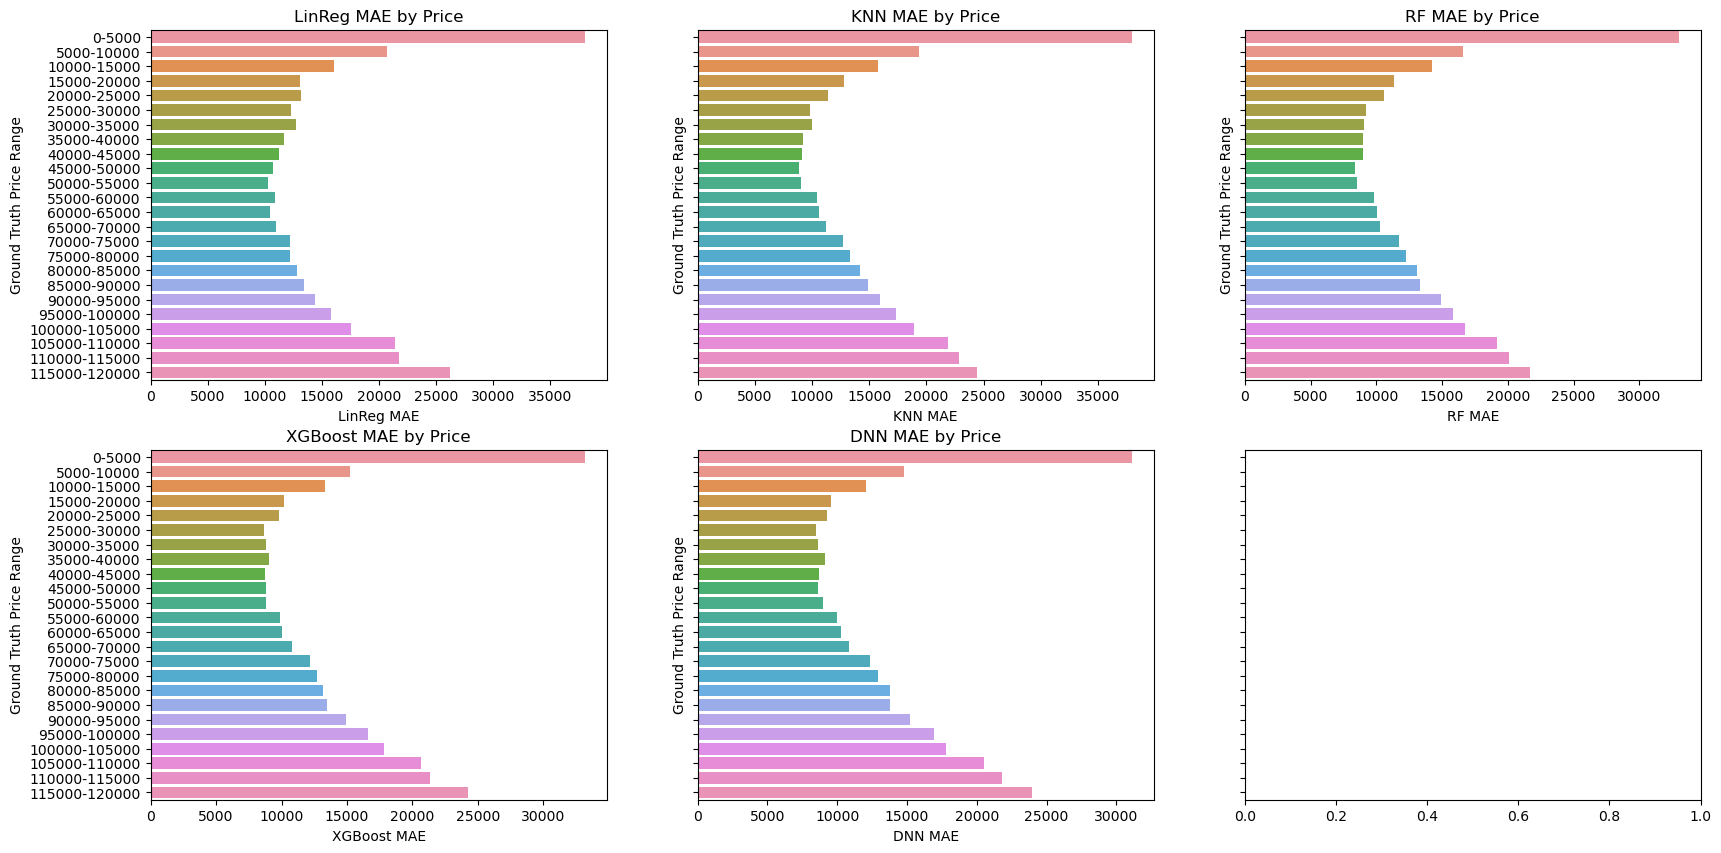

In [ ]:
generate_plots(pred_df.copy(), models=['LinReg', 'KNN', 'RF', 'XGBoost', 'DNN'], price_bounds=(0, 120000), step=5000, rows=2, figsize=(20,10),)
plt.show()

The above histograms indicate that our models all perform best on housing in the $15,000-70,000 range. However, for extremely cheap housing, or for more expensive housing, our models do not perform as well.

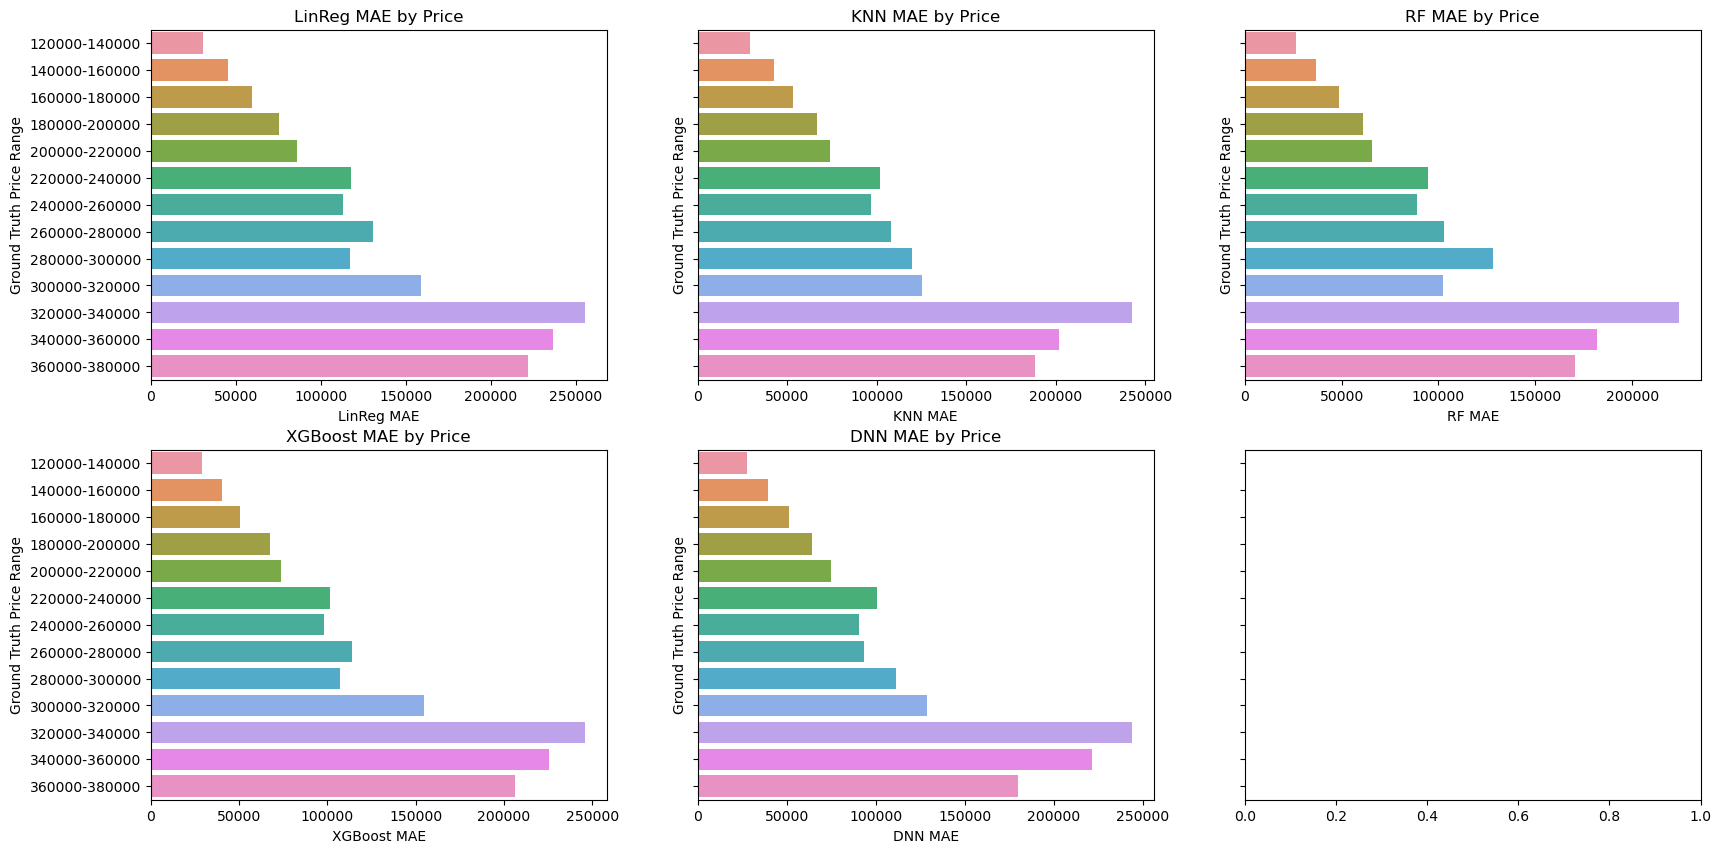

In [ ]:
generate_plots(pred_df, models=['LinReg', 'KNN', 'RF', 'XGBoost', 'DNN'], price_bounds=(120000, 380000), step=20000, rows=2, figsize=(20,10),)
plt.show()

For particularly expensive housing our model has significant loss, reaching hundreds of thousands of dollars for very expensive housing.

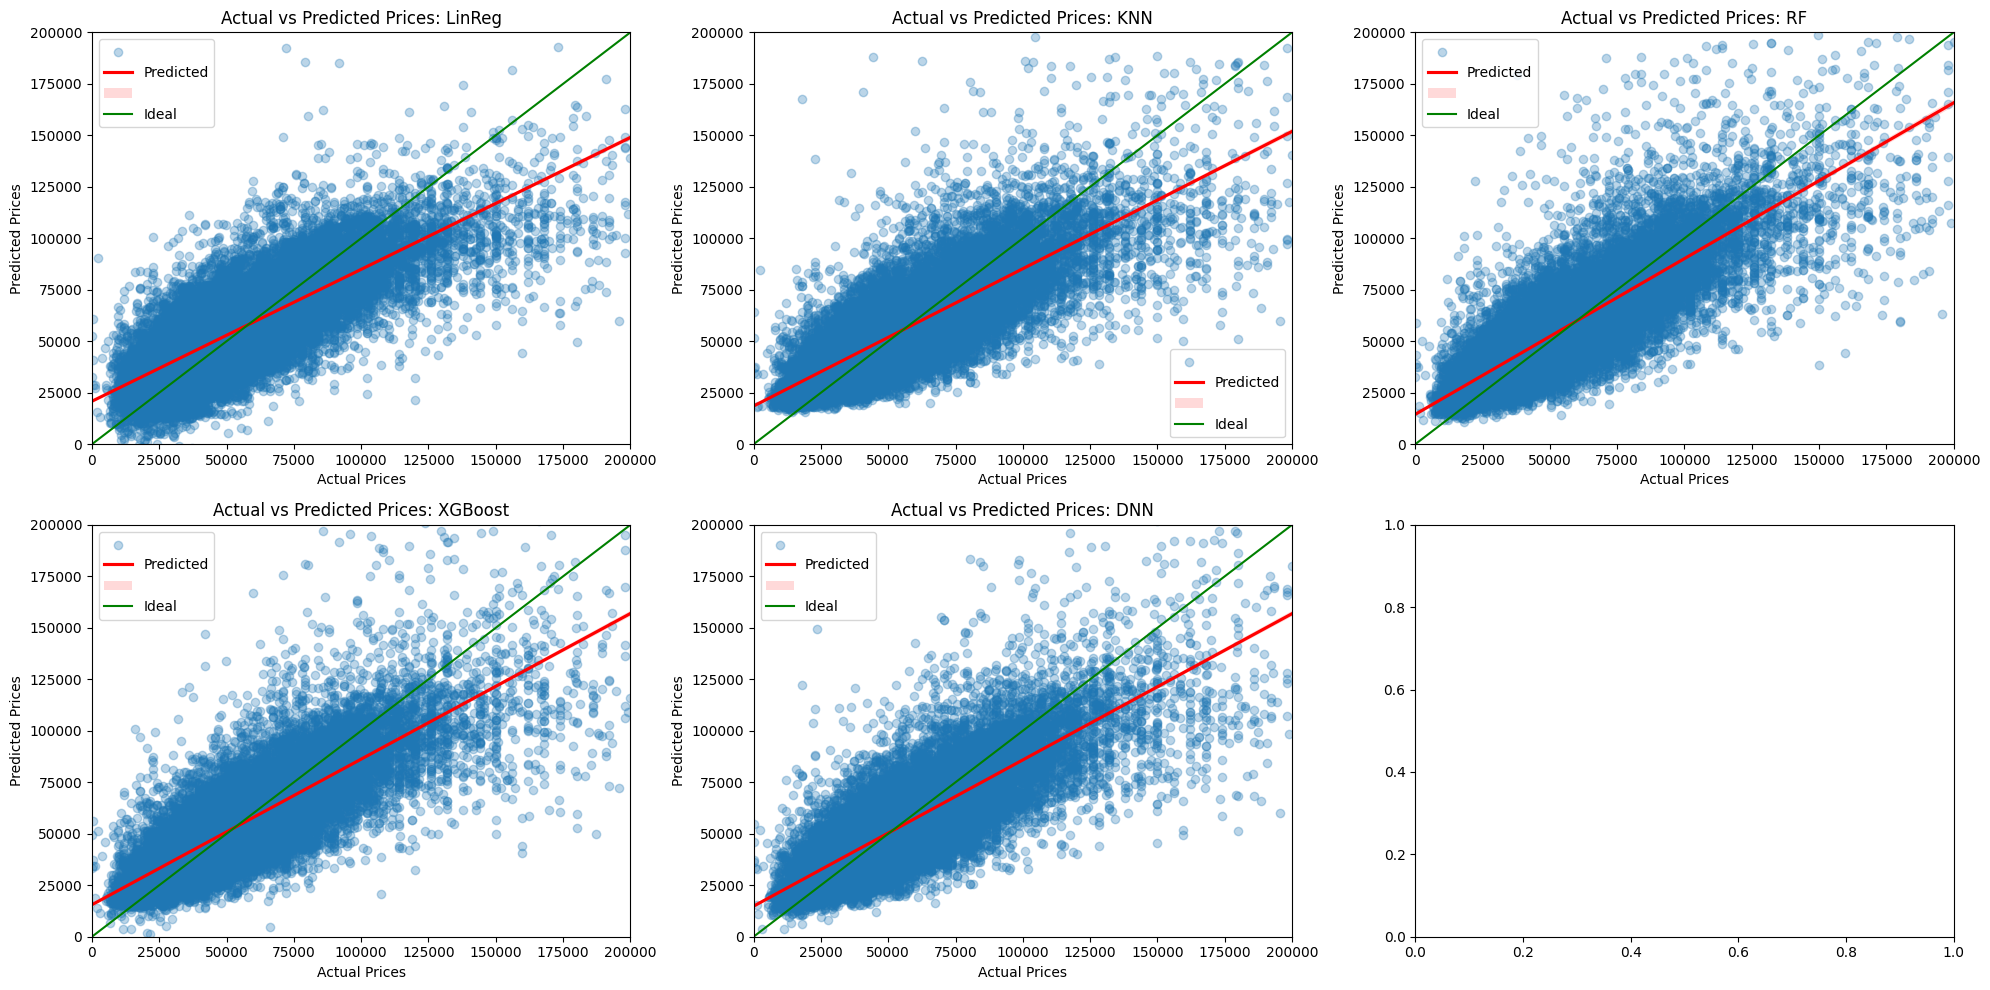

In [ ]:
models = ['LinReg', 'KNN', 'RF', 'XGBoost', 'DNN']
num_plots = len(models)
num_rows = 2
num_cols = (num_plots + 1) // num_rows

max_dim = 2e5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

sub_200k_df = pred_df[pred_df['Price'] <= max_dim]

for idx, model_name in enumerate(models):
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    axes[row_idx, col_idx].scatter(sub_200k_df['Price'], sub_200k_df[model_name], alpha=0.3)
    reg_line = sns.regplot(x=sub_200k_df['Price'], y=sub_200k_df[model_name], scatter=False, line_kws={'color': 'red'}, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_xlabel('Actual Prices')
    axes[row_idx, col_idx].set_ylabel('Predicted Prices')
    axes[row_idx, col_idx].set_title(f'Actual vs Predicted Prices: {model_name}')
    axes[row_idx, col_idx].set_xlim([0, max_dim])
    axes[row_idx, col_idx].set_ylim([0, max_dim])
    real_line = axes[row_idx, col_idx].axline((max_dim, max_dim), slope=1, color='green')
    axes[row_idx, col_idx].legend(labels=[None, 'Predicted', None, 'Ideal'])
plt.tight_layout()
plt.show()

This analysis reveals a few important trends:
1. Across the board, our models predict best on **cheaper housing** (i.e. &lt; \$120k) since that's where we have the most data.
2. All of our models &mdash; though each with very different learning paradigms and methodology &mdash; perform best on the same data and struggle with the same data.
   - All of our models also seem to (in general) underestimate value for housing greater than \\$50k and overestimate value for housing less than $50k

# Discussion

### Interpreting the result

A clear observation is that all of our models perform best on cheaper/standard-price housing. When applied to the real world, our model would be the most useful for the average consumer looking for an afforable place in Moscow. This result was expected, since most of our samples were for real estate with lower value, so of course our model performed better for these data.

Our main conclusion is that **Moscow real estate price predictions are limited primarly by data quality (feature richness)**. The Russian real estate market is a large, emerging market with houses going up for sale; our dataset reflects this, as it has many, many samples. However, interestingly, all of our models seem to perform similarly on similar price ranges. Linear regression, KNNs, random forests, XGBoost, and DNNs each have different strengths and weaknesses, and each have their own error cases. So, if the high error rates for less-expensive and more-expensive housing were due to learning methodology, then each of our trained models would likely show some variability in performance across the price ditribution. However, they do not, which means it's likely the case that our data is limited in feature granularity.

Our first subpoint of justification is examination of our learning curves from the model fitting section. Although our dataset is very large, thanks to CuML acceleration we were able to perfrom 3-fold CV for each model (with exception of the DNN, for which we could only estimate 'best' hyperparams by running on a limited number of models). Each classical ML model's learning curve inidicated that, while more data could marginally improve performance, it would not significantly change the loss. While it is not feasible to get a learning curve for the DNN, given the overfitting after only 100 epochs on a 100k-large sample size, it is unlikely that more data would improve performance significantly enough to fix the issues described above.

Our second subpoint of justification is that all of our models over/under-value housing in the same ranges in similar ways. While our best-performing models (Random Forest, XGBoost, DNN) are able to marginally improve results compared to KNN and Linear Regression, they still sucumb to price overesitmation of low-end housing and price underestimation of high-end housing. Our random forest and XGBoost models were built on trees, meaning they could learn a piecewise linear descision boundary, and DNNs can universally approximate any function. However, while these three models were our best-performing, they did not drastically outperform our linear regression. In reality, housing prices can vary due to several factors (style, location, proximity to public services and shopping centers, etc). This again indicates that our features are likely too simple, and additional features imposing some sort of non-linearity are necessary for more effective prediction.

Our final subpoint of note is that, if used in the real world given the data currently available, our models would be best used to predict low-end housing. Firstly, there is much less data available for high-end housing due to the low demand for such housing from the general public, so it is difficult to fit a model wihtout overfitting to the available data; we see this reflected in the very high MAE for housing worth more than $120k. Secondly, in a practical sense, high-end housing is likely even more subject to variation from metrics that are difficult to track (luxury features, 'art' of design and layout, etc.). These results fit well with our overall goal of making real estate value prediction more accessible and straightforward, since those selling expensive properties likely have resources for huamn prediction from professional agents.

### Limitations

Our findings indicate an important need for improved data in Moscow/Russian real estate markets. Because the real estate market in Russia (and, in our case, Moscow specfically) is emerging, data collection is likely not to the same standard as in places like America, where established housing and real estate services like Zillow have been collecting data on houses for years. To perform better predictive analysis on Moscow real estate prices would require sophisticated data centralization and colletion initiatives which have not been implemented yet. Once the market has matured more, and as more feature-rich data becomes available, ML and DL methods can be more easily applied for sophisticated predictive analysis. on many different ranges of pricing and many different types of real estate.

Additionally, our data does not include new costs from 2022 or 2023. Geopolitical and economic tensions in Russia have likely thrown markets like real estate, which is centered around long-term investment, into flux, so our model would likely incorrectly estimate prices for new housing available for the forseeable future as the Russian economy make long-term investments tumultuous.

Finally, additional hyperparam tuning for XGBoost and more complex DNN strucutres (e.g. very deep NN with skip connections, additional tuning for LeakyReLU, AdamW, etc hyperparams, etc) might result in better performance from these models. However, this sort of hyperparam tuning would require either better computational resources or more time.

### Ethics & Privacy

- The Russian economy is currently in a volatile position due to the war in Ukraine. If our model were to be used as a source of truth, and if it were too optimistic or pessimistic, we could wrongfully inflate the market or cause people to sell their homes for less than they are truly worth. Real estate investments can make or break one’s livelihood, especially in a turbulent and growing market like Russia, so making sure our model is functional and usable is important.
- The dataset doesn’t contain explicit personal information, but it contains information like date and time of listing publication and longitude/latitude location, which could potentially be used to identify individuals.
- The data is collected under specific legal provisions, which means it is collected lawfully, but it should be ensured that the use of this data for a machine learning project aligns with the original purpose of data collection.
- Any dataset has a potential for systematic biases, which could result in biased outcomes in a machine learning project. It is important to be aware of this and to either adjust the dataset to more fairly represent different groups or adjust the machine learning model to reduce bias in its prediction.

### Conclusion

Our exploration provides a usable model for price prediction on Moscow real estate, as well as justification for increased data-gathering initiatives to get more fine-grained, feature-rich data in emerging Russian real estate markets. Most famous western housing initiatives have been gathering large stores of data on which to build more complicated models, so higher quality data collection in the Russian real estate industry will likely result in better prediction for housing in 'standard' pricing ranges, as well as better prediction for housing in extreme price ranges.

Future work could also involve time-series analysis or prediction on other large Russian cities to determine if the above trends found in Moscow are consisten in other parts of Russia.

# Footnotes
<a name = "nahb"></a>1.[^](#nahb): Housing’s Contribution to Gross Domestic Product. https://www.nahb.org/news-and-economics/housing-economics/housings-economic-impact/housings-contribution-to-gross-domestic-product#:~:text=Share%3A,homes%2C%20and%20brokers'%20fees.<br> 
<a name="keyfactors"></a>2.[^](#keyfactors): Key Factors That Drive the Real Estate Market. https://www.investopedia.com/articles/mortages-real-estate/11/factors-affecting-real-estate-market.asp <br>
<a name="Redfin"></a>3.[^](#demographics): Is It Cheaper to Live in the City or the Suburbs?
. https://www.apartmenttherapy.com/suburbs-vs-city-cost-of-living-265646  <br>
<a name="Zestimate"></a>4.[^](#Zestimate): Building the Neural Zestimate
. https://www.zillow.com/tech/building-the-neural-zestimate/ <br>
<a name="Redfin"></a>5.[^](#Redfin): Redfin Estimate. https://www.redfin.com/redfin-estimate <br>



# Justification for Extra Credit

(Seciton implemented per syllabus under "Grading": https://canvas.ucsd.edu/courses/45059)

Our justification for extra credit/above and beyond work is as follows:

1. We set up and successfully implemented RAPIDS CuDF and CuML, which not only required and understanding of the API, but also of technical details like installation (managing bugs with CUDA on WSL2 and Conda) as well as a proper understanding of the models and algorithms since RAPIDS implements some models differently, and some aspects of implementation are more prone to crashing.
   - Additionally needed to write custom grid search, manage variables used in hparam tuning, etc, to work around unstable elements of RAPIDS API
2. Evaluation of DNN with concepts not throughly discussed/gone over in class (custom datasets, dataloaders, different model architectures, different optimizers, MPS, etc, using PyTorch), as well as usage of tools like WandB which were not discussed in class.
3. Evaluated **five** different models, all with their own hparam tuning and analysis
4. Well-justified arguments with data and analysis throughout.

Thank you for considering our project for Extra Credit.